In [32]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
plt.rc('text', usetex=True)
np.set_printoptions(precision=4)


from ipywidgets import IntProgress
from IPython.display import display
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

In [74]:
val2 = np.genfromtxt("val2.dat")
def brez(M):
    return np.full(shape=M, fill_value=1, dtype=np.int)
def hann(M):
    arej = np.arange(0,M,1)
    return 0.5*(1-np.cos(2*np.pi*arej/M))
def welch(M):
    arej = np.arange(0,M,1)
    return 1-((arej-M/2)/(M/2))**2
    
okenske_funkcije = [brez, np.bartlett,np.blackman,np.hamming, np.hanning, welch, hann]


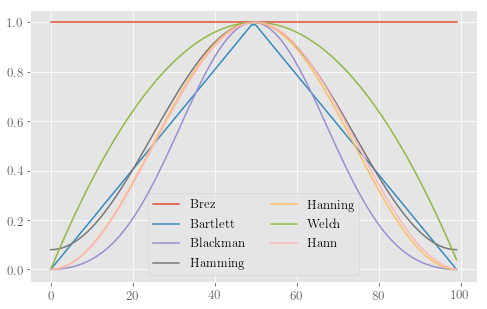

In [77]:
plt.figure(figsize=(8,5))
for funk in okenske_funkcije:
    plt.plot(funk(100), label=funk.__name__.capitalize())
plt.legend(ncol=2)
#plt.savefig("1-1-okenske-funkcije.pdf")
plt.show()

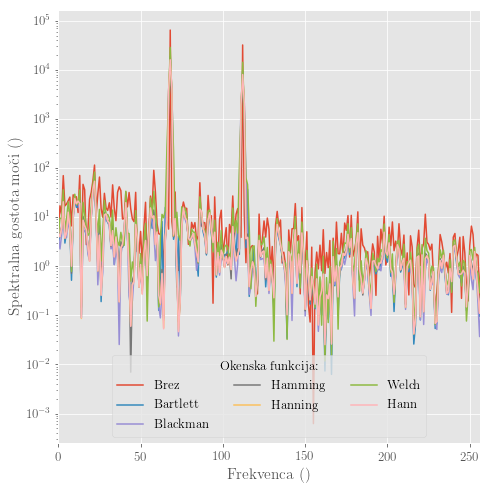

In [68]:
plt.figure(figsize=(7,7))
M = len(val2)
for funk in okenske_funkcije:
    plt.xlabel("Frekvenca ()")
    plt.ylabel("Spektralna gostota moči ()")
    plt.plot((np.abs(np.fft.fft(val2*funk(M)))**2), label=funk.__name__.capitalize())
    plt.xlim((0,M//2))
    plt.semilogy()
plt.legend(ncol=3, title="Okenska funkcija:", loc="lower center")
plt.tight_layout()
plt.savefig("1-2-val2.pdf")
plt.show()

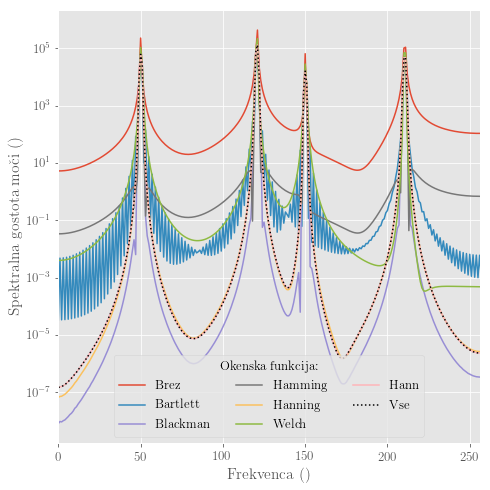

In [97]:
val3 = np.genfromtxt("val3.dat")
plt.figure(figsize=(7,7))
M = len(val3)
plt.rc('text', usetex=True)
def vse_okenske_funkcije(M):
    arej = brez(M)
    for funk in okenske_funkcije:
        arej = arej*funk(M)
    return arej
okenske_funkcije = [brez, np.bartlett,np.blackman,np.hamming, np.hanning, welch, hann]
for funk in okenske_funkcije:
    plt.xlabel("Frekvenca ()")
    plt.ylabel("Spektralna gostota moči ()")
    plt.plot((np.abs(np.fft.fft(val3*funk(M)))**2), label=funk.__name__.capitalize())
plt.plot((np.abs(np.fft.fft(val3*funk(M)))**2), label="Vse", c="k", linestyle="dotted")

plt.xlim((0,M//2))
plt.semilogy()
plt.legend(ncol=3, title="Okenska funkcija:", loc="lower center")
plt.tight_layout()
plt.savefig("1-2-val3.pdf")
plt.show()

## decimacija signala

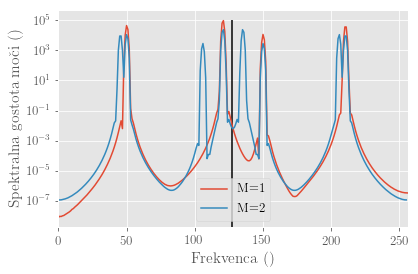

In [194]:
plt.figure(figsize=(6,4))
podatki = np.genfromtxt("val3.dat")
podatki *= np.blackman(512)
from scipy import fftpack
for i in [1,2]:
    fft = fftpack.fft(podatki[::i])
    D = len(fft)//2
    fft = np.abs(fft)**2
    plt.plot(fft, label=f"M={i}")
    

plt.xlabel("Frekvenca ()")
plt.ylabel("Spektralna gostota moči ()")
plt.xlim(0, 512//2)
plt.semilogy()
plt.legend()
plt.vlines(x=127, ymin=0, ymax=10**5)
plt.tight_layout()
plt.savefig("1-3-dec-val3.pdf")
plt.show()

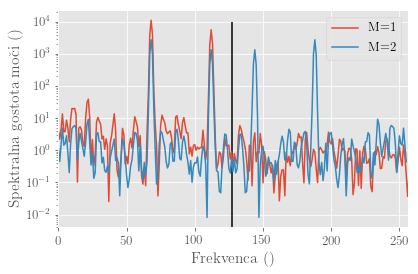

In [196]:
plt.figure(figsize=(6,4))
podatki = np.genfromtxt("val2.dat")
podatki *= np.blackman(512)
from scipy import fftpack
for i in [1,2]:
    fft = fftpack.fft(podatki[::i])
    D = len(fft)//2
    fft = np.abs(fft)**2
    plt.plot(fft, label=f"M={i}")
    

plt.xlabel("Frekvenca ()")
plt.ylabel("Spektralna gostota moči ()")
plt.xlim(0, 512//2)
plt.semilogy()
plt.legend()
plt.vlines(x=127, ymin=0, ymax=10**4)
plt.tight_layout()
plt.savefig("1-3-dec-val2.pdf")
plt.show()

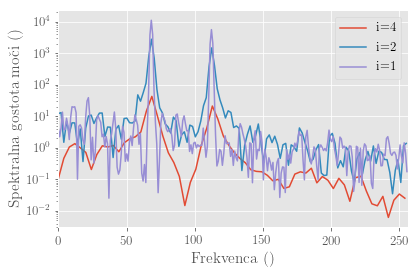

In [208]:
plt.figure(figsize=(6,4))
podatki = np.genfromtxt("val2.dat")
podatki *= np.blackman(512)
D = len(podatki)
from scipy import fftpack
for i in [4,2,1]:
    fft = fftpack.fft(podatki[:D//i])
    fft = np.abs(fft)**2
    razpon = np.linspace(0,512, len(fft))
    plt.plot(razpon[:len(fft)//2], fft[:len(fft)//2], label=f"i={i}")
    

plt.xlabel("Frekvenca ()")
plt.ylabel("Spektralna gostota moči ()")
plt.xlim(0, 512//2)
plt.semilogy()
plt.legend()

plt.tight_layout()
plt.savefig("1-4-val2.pdf")

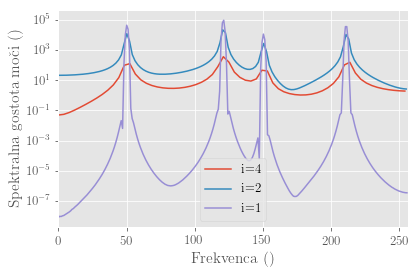

In [210]:
plt.figure(figsize=(6,4))
podatki = np.genfromtxt("val3.dat")
podatki *= np.blackman(512)
D = len(podatki)
from scipy import fftpack
for i in [4,2,1]:
    fft = fftpack.fft(podatki[:D//i])
    fft = np.abs(fft)**2
    razpon = np.linspace(0,512, len(fft))
    plt.plot(razpon[:len(fft)//2], fft[:len(fft)//2], label=f"i={i}")
    

plt.xlabel("Frekvenca ()")
plt.ylabel("Spektralna gostota moči ()")
plt.xlim(0, 512//2)
plt.semilogy()
plt.legend()

plt.tight_layout()
plt.savefig("1-4-val3.pdf")